<a href="https://colab.research.google.com/github/mvigoda/fast_ai_course/blob/main/bear_classifi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [2]:
#hide
from fastbook import *
from fastai.vision.widgets import *


In [3]:
search_images_ddg

<function fastbook.search_images_ddg>

In [4]:
# key = os.environ.get('AZURE_SEARCH_KEY', 'XXX')
# 

In [5]:
ims = search_images_ddg('grizzly bear')
len(ims)

200

In [6]:
dest = 'images/grizzly.jpg'
download_url(ims[0], dest)


Path('images/grizzly.jpg')

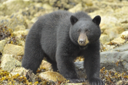

In [7]:
im = Image.open(dest)
im.to_thumb(128,128)

In [8]:
bear_types = 'grizzly','black','teddy'
path = Path('bears')


In [9]:
path

Path('bears')

In [10]:
urls = search_images_ddg('bears', max_images=200)
len(urls)

200

In [11]:
print('Current Directory:',os.getcwd())


Current Directory: /content


In [12]:
# key = os.environ.get('AZURE_SEARCH_KEY', 'XXX')


In [13]:
if not path.exists():
    path.mkdir()
    for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        # results = search_images_ddg(key, f'{o} bear')
        results = search_images_ddg(f'{o} bear')
        download_images(dest, urls=results)


In [14]:
fns = get_image_files(path)
fns


(#580) [Path('bears/grizzly/ac3bbe10-50d4-4aee-b0ff-278e209dddce.jpg'),Path('bears/grizzly/a580fbec-4f25-4fe0-96f6-aa0a3bd7318d.jpg'),Path('bears/grizzly/25867b17-0d48-42a9-acca-7be78799bf39.jpg'),Path('bears/grizzly/6834f468-d0e9-4629-964e-65953bc5af8b.jpg'),Path('bears/grizzly/1fb0f60d-de4b-459b-a868-bcafdb8a471d.JPG'),Path('bears/grizzly/047b8c83-5e51-436d-9a1a-2f0086fd76e1.jpg'),Path('bears/grizzly/687e8edd-c478-405a-947d-e968334a6598.jpg'),Path('bears/grizzly/5d849b58-f741-4b31-9bbd-a88775ad890e.jpg'),Path('bears/grizzly/f67421ac-a328-4e69-b268-3650227d9e03.jpg'),Path('bears/grizzly/a30dd418-29d8-4373-8d18-a8bb122f37c2.jpg')...]

# Find failed images


In [16]:
failed = verify_images(fns)
failed
len(failed), type(failed[0]), failed[0]

IndexError: ignored

# Show a pic in one of the folders

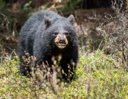

In [17]:

pic_0 = os.listdir(os.path.join(os.getcwd(),'bears/black'))[0]

# im = Image.open(failed[0])  produces UnidentifiedImageError - presumably because you cannot read it
im = Image.open(os.path.join(os.getcwd(),'bears/black',pic_0))
im.to_thumb(128,128)

# How many pics in each folder?
Then unlink the bad files

In [18]:
list_of_dirs = os.listdir('bears')
# for dir in list_of_dirs:
#   print(dir, len(os.listdir('bears/' + dir)))
print('Files in each directory:')
for num, dir in enumerate(list_of_dirs, start=1):
  print("{0:3}: {1:10}  {2}".format(num, dir,  len(os.listdir('bears/' + dir)))) 
from os import unlink
failed.map(unlink)
list_of_dirs = os.listdir('bears')
# for dir in list_of_dirs:
#   print(dir, len(os.listdir('bears/' + dir)))
print('Files in each directory:')
for num, dir in enumerate(list_of_dirs, start=1):
  print("{0:3}: {1:10}  {2}".format(num, dir,  len(os.listdir('bears/' + dir)))) 

Files in each directory:
  1: grizzly     190
  2: teddy       197
  3: black       193
Files in each directory:
  1: grizzly     190
  2: teddy       197
  3: black       193


In [19]:
doc(verify_images)

verify_images(fns)
Find images in `fns` that can't be opened

To get a prettier result with hyperlinks to source code and documentation, install nbdev: pip install nbdev


In [20]:
class DataLoaders(GetAttr):
    def __init__(self, *loaders): self.loaders = loaders
    def __getitem__(self, i): return self.loaders[i]
    train,valid = add_props(lambda i,self: self[i])


In [21]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))


In [22]:
dls = bears.dataloaders(path)

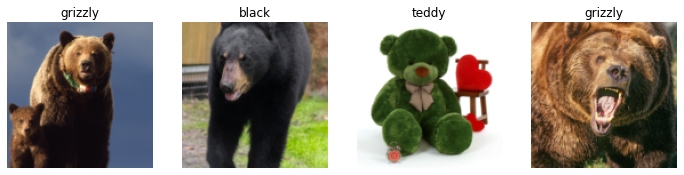

In [23]:
dls.show_batch(max_n = 4, nrows = 1)

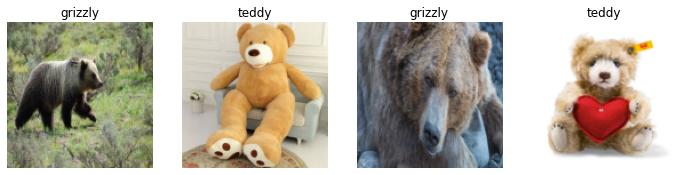

In [24]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)


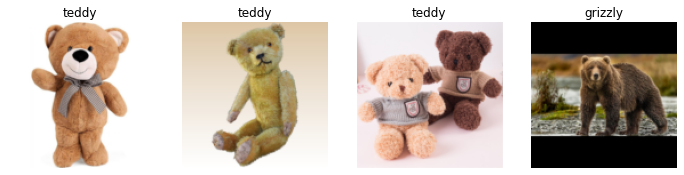

In [58]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)


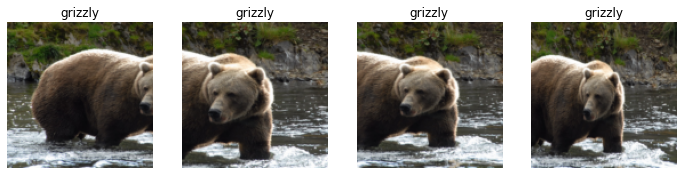

In [59]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)


# Data Augmentation 
shift, transpose, different coloring/shading

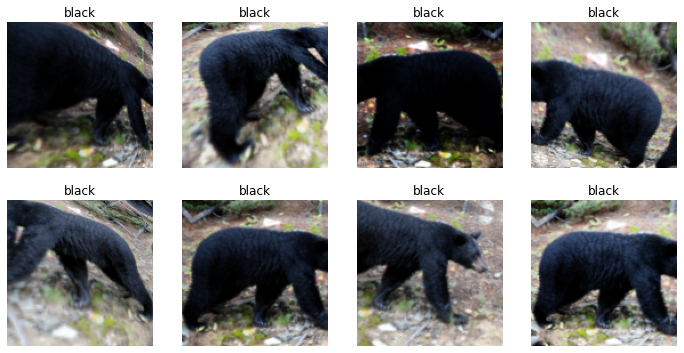

In [25]:


bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)


# Training the Model


In [26]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)


In [27]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:136: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


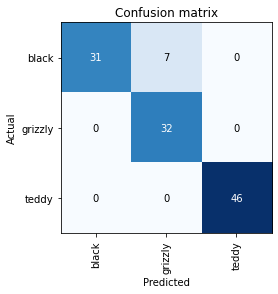

In [28]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

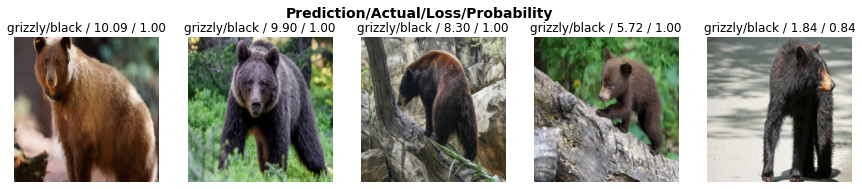

In [29]:
interp.plot_top_losses(5, nrows=1)


In [30]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner


In [ ]:
#hide
# for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)


In [31]:
learn.export()


In [32]:
path = Path()
path.ls(file_exts='.pkl')


(#1) [Path('export.pkl')]

In [33]:
learn_inf = load_learner(path/'export.pkl')


Upload an image

In [34]:
file_path = '/content/menacing-bear-snarling_h.jpg'
im = Image.open(file_path)
im.to_thumb(128,128)
learn_inf.predict(file_path)


('grizzly', TensorBase(1), TensorBase([1.9992e-05, 9.9998e-01, 6.7452e-08]))

This has returned three things: the predicted category in the same format you originally provided (in this case that's a string), the index of the predicted category, and the probabilities of each category. The last two are based on the order of categories in the vocab of the DataLoaders; that is, the stored list of all possible categories. At inference time, you can access the DataLoaders as an attribute of the Learner:


https://github.com/fastai/fastbook/blob/master/02_production.ipynb



In [35]:
learn_inf.dls.vocab

['black', 'grizzly', 'teddy']

In [37]:
#hide_output
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [38]:
img = PILImage.create(btn_upload.data[-1])

In [39]:
#hide_output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl


Output()

In [40]:
pred,pred_idx,probs = learn_inf.predict(img)


In [41]:
#hide_output
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: teddy; Probability: 1.0000')

In [42]:
#hide_output
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [43]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [44]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()


In [45]:
#hide_output
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])


# Voila


In [47]:
# !pip install voila
# !jupyter serverextension enable --sys-prefix voila


In [48]:
# from google.colab import drive
# drive.mount('/gdrive')
# %cd /gdrive/My\ Drive/{location you want to move}

In [49]:
# def colab_img():
#   from ipywidgets import widgets
#   button_choice = widgets.Button(description="Predict", button_style='success')
#   colab_img.output_variable = (widgets.Text())
#   display(colab_img.output_variable)
#   display(button_choice)
#   def on_choice(b):
#     j = Path(colab_img.output_variable.value)
#     is_cat,_,probs = learn.predict(j)
#     print(f"Is this a cat?: {is_cat}.") 
#     print(f"Probability it's a cat: {probs[1].item():.6f}"
#   button_choice.on_click(on_choice)
